In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

No Missing Values

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [10]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Car Name was irrelevant in the price prediction, we can later refer to it with indexes.

In [11]:
final_df['Current_Year'] = 2020

In [12]:
final_df['Car_Age'] = final_df['Current_Year'] - final_df['Year']

In [13]:
final_df.drop(['Year'],axis = 1, inplace = True)

In [14]:
final_df.drop(['Current_Year'],axis = 1, inplace = True)

In [15]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


Categorical Attributes: Fuel_Type, Seller_Type, Transmission

In [16]:
final_df = pd.get_dummies(final_df, drop_first=True)

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [18]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


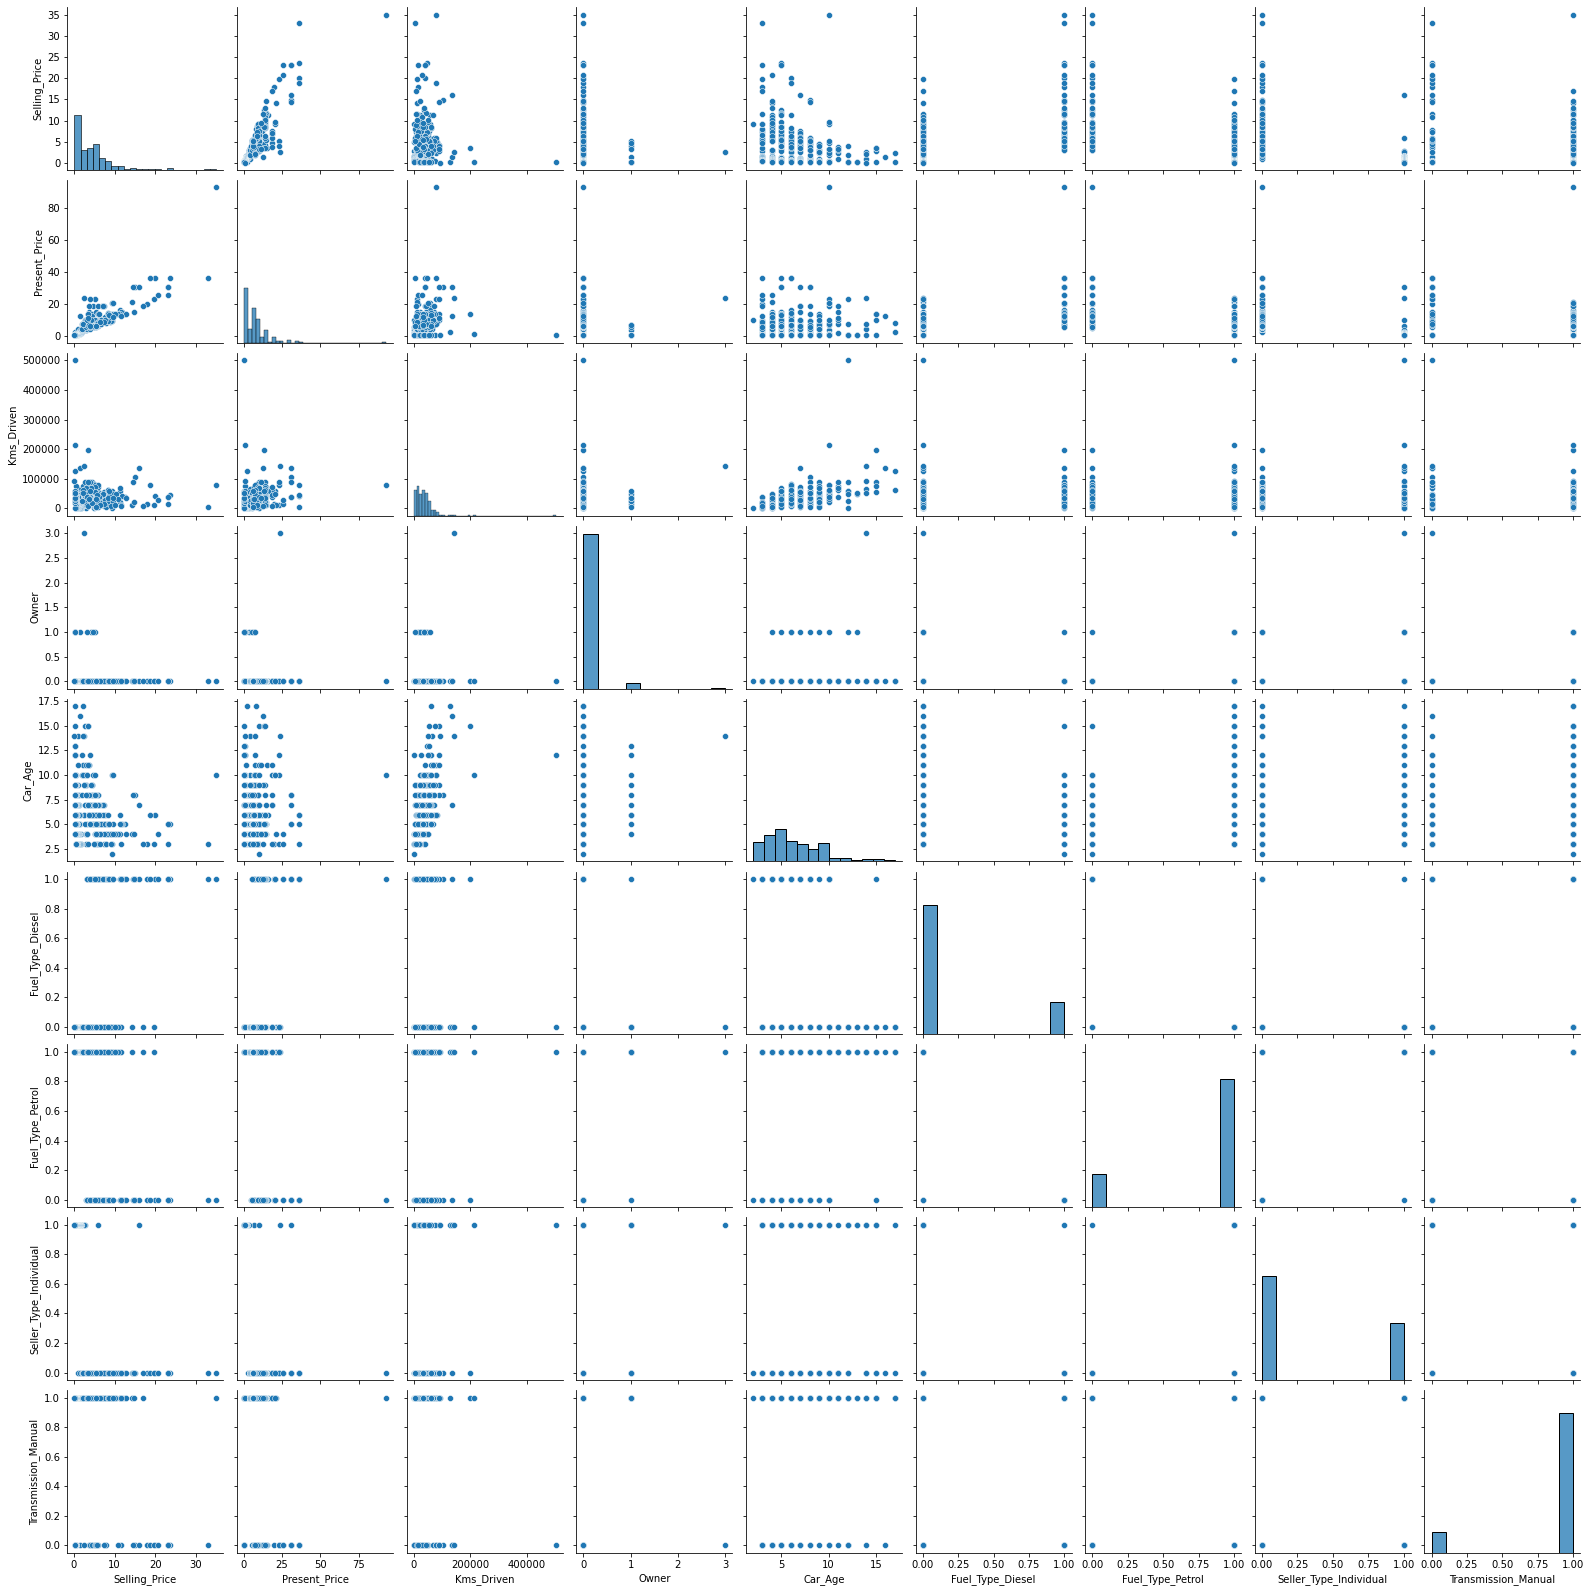

In [19]:
import seaborn as sns
sns.pairplot(final_df)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
corrmat = final_df.corr()
corrmat.sort_values('Car_Age', ascending=False)

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128


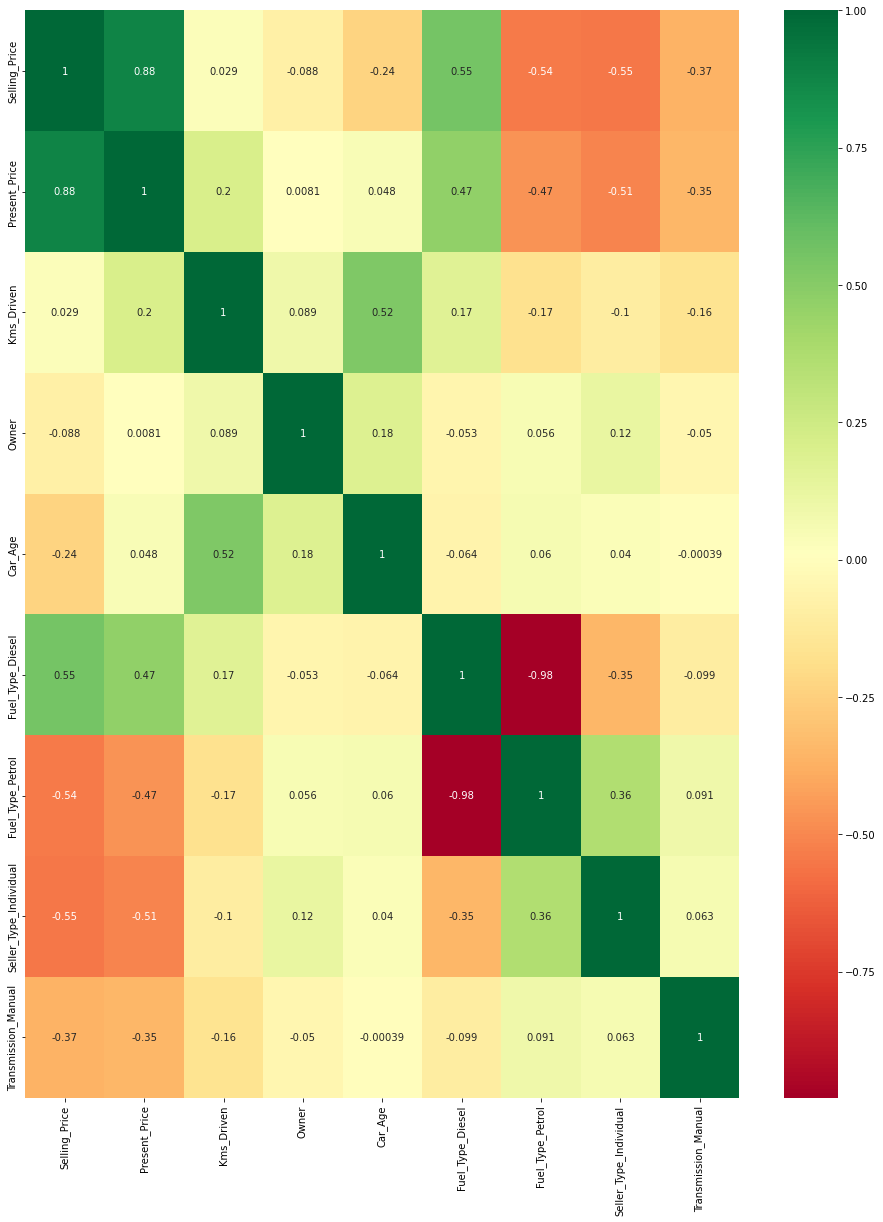

In [22]:
top_corr_features = corrmat.index
plt.figure(figsize=(16,20))
g = sns.heatmap(final_df[top_corr_features].corr(),annot = True, cmap='RdYlGn')

In [23]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [26]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
model.feature_importances_

array([0.39663318, 0.04278723, 0.00127287, 0.07487219, 0.2121166 ,
       0.01291144, 0.13181286, 0.12759363])

<AxesSubplot:>

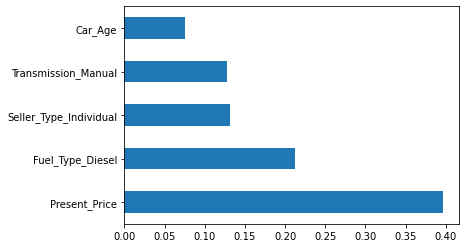

In [28]:
feat_imp = pd.Series(model.feature_importances_, index = X.columns)
feat_imp.nlargest(5).plot(kind = 'barh')

Present Price of the Car and it being a Diesel Fuel Type turn out to be the most important features

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

In [30]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [31]:
import numpy as np
# Number of Trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
#No of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [34]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
rf = RandomForestRegressor()

In [36]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [37]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
predictions = rf_random.predict(X_test)

In [39]:
predictions

array([ 7.03552761,  0.50559459,  4.99689873,  8.42415301, 12.2076405 ,
        5.23480295,  3.36016016,  0.43114315,  3.86618555,  5.11129155,
        2.85143308,  0.65254134,  5.10607236,  7.24232683,  7.46702935,
       12.35442466,  7.04240134,  4.14527605,  0.48284958,  1.29569411,
        3.2243224 ,  5.19828342,  5.44149623, 10.46056637,  0.24049005,
        0.68628301,  0.32454456,  0.68029312,  0.50429761,  4.91590618,
        2.8571362 ,  5.79078591,  0.51546875,  7.1606343 ,  3.286307  ,
        1.14865211,  5.72138903,  5.46571383,  0.25651433,  7.74521565,
        7.56779358, 21.86926539,  5.10057426,  4.55884877,  5.54855508,
       10.39694674,  0.25393953,  0.76038984,  5.44187442,  6.85772955,
        6.62403294,  2.97083593,  5.33140396, 21.86926539,  1.14865211,
        1.14649836,  0.4108311 ,  2.75356393,  3.61275933,  2.55335495,
        4.71168895])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

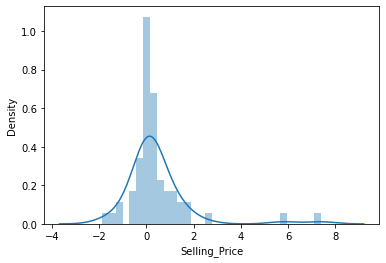

In [40]:
sns.distplot(y_test-predictions)

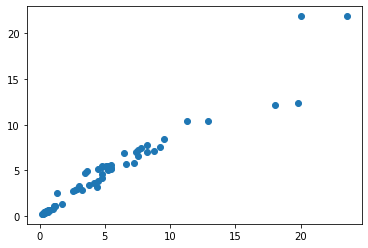

In [41]:
plt.scatter(y_test, predictions)

In [42]:
import pickle
file = open('car_price_prediction.pkl', 'wb')
pickle.dump(rf_random, file)
